In [1]:
#event那条线的数据
import pandas as pd
import numpy as np
import datetime
import shennong.utils.symbol as sn_symbol
from shennong.stk import stream
from shennong.utils import symbol
from shennong.stk import bar
from shennong.utils import symbol,trading_days
import time
import pymysql.cursors
import matplotlib.pyplot as plt
import xarray as xr

ModuleNotFoundError: No module named 'shennong'

In [260]:
class MySQLConnection():
    
    def __init__(self):
        return
    
    def __enter__(self):
        connection = pymysql.connect(host='192.168.222.5',
                                     user='root',
                                     password='adadad',
                                     db='feidi',
                                     charset='utf8mb4',
                                     port = 3306)
        return connection
    
    def __exit__(self,a,b,c):
        return False

In [6]:
with MySQLConnection() as connection:

    time_start = '2020-08-01 09:31:00'
    time_end = '2021-06-25 09:31:00'
    
    st_time = time.time()
    #sql= "SELECT * FROM feidi.feidiinfo"
    sql= "SELECT * FROM feidi.feidiinfo where createTime between '{}' and '{}'".format(time_start,time_end)
    
    data = pd.read_sql(sql,connection)
    
    connection.close()
    
    et_time = time.time()
    
    print(str(et_time - st_time)[:7])

209.668


In [263]:
data=pd.read_pickle('data.pkl')

In [264]:
save=data

In [265]:
data = data[['stockCode','createTime']]

In [266]:
#去重
data['createTimeDay'] = data['createTime'].dt.date
data = data.drop_duplicates(subset=['createTimeDay','stockCode'])

<ipython-input-266-dda911340741>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['createTimeDay'] = data['createTime'].dt.date


In [10]:
#gupiao data
sym_list = symbol.load(region='cn',product='ashare')
date_line = trading_days.load('2020-07-21', '2021-06-27', region='cn', product='ashare')
load_start = date_line[0]
load_end = date_line[-1]

source_name = 'raw_liuyue_basic'
liuyue_stocks = bar.load(start_datetime = load_start, end_datetime = load_end+' 15:00:00',
                     region='cn', product='ashare', freq='1minute',symbol_list = sym_list,
                     key_list = source_name,
                     load_root='default', verbose=True)#, restoration='backward_restoration')


key_new = ['close', 'high', 'low', 'open', 'volume', 'turnover']
liuyue_stocks['KEY']=key_new
minute_stocks = liuyue_stocks

Load key list is: ['raw_liuyue_close_price', 'raw_liuyue_high_price', 'raw_liuyue_low_price', 'raw_liuyue_open_price', 'raw_liuyue_volume', 'raw_liuyue_turnover']
Load key list belong to below h5 key group: {'raw_liuyue_basic': ['raw_liuyue_close_price', 'raw_liuyue_high_price', 'raw_liuyue_low_price', 'raw_liuyue_open_price', 'raw_liuyue_turnover', 'raw_liuyue_volume']}
Constructing the multiprocess shared_data_array_base, len: 4655 * 227 * 240 * 6
POSIX system, share numpy array between process
Start to load all data in  60  processes , datetime: 2021-07-29 09:58:36.562086
Loaded h5 file: /mnt/sda/NAS/AllData/cn_ashare/1minute/raw_liuyue_basic/2020-07-31.h5
Loaded h5 file: /mnt/sda/NAS/AllData/cn_ashare/1minute/raw_liuyue_basic/2020-08-13.h5
Loaded h5 file: /mnt/sda/NAS/AllData/cn_ashare/1minute/raw_liuyue_basic/2020-08-14.h5Loaded h5 file:
 /mnt/sda/NAS/AllData/cn_ashare/1minute/raw_liuyue_basic/2020-07-29.h5
Loaded h5 file: /mnt/sda/NAS/AllData/cn_ashare/1minute/raw_liuyue_basic/20

Loaded h5 file: /mnt/sda/NAS/AllData/cn_ashare/1minute/raw_liuyue_basic/2021-04-22.h5
Loaded h5 file: /mnt/sda/NAS/AllData/cn_ashare/1minute/raw_liuyue_basic/2021-04-21.h5
Loaded h5 file: /mnt/sda/NAS/AllData/cn_ashare/1minute/raw_liuyue_basic/2021-04-26.h5
Loaded h5 file: /mnt/sda/NAS/AllData/cn_ashare/1minute/raw_liuyue_basic/2021-04-28.h5
Loaded h5 file: /mnt/sda/NAS/AllData/cn_ashare/1minute/raw_liuyue_basic/2021-04-23.h5
Loaded h5 file: /mnt/sda/NAS/AllData/cn_ashare/1minute/raw_liuyue_basic/2021-04-27.h5
Loaded h5 file: /mnt/sda/NAS/AllData/cn_ashare/1minute/raw_liuyue_basic/2021-04-29.h5
Loaded h5 file: /mnt/sda/NAS/AllData/cn_ashare/1minute/raw_liuyue_basic/2021-05-06.h5
Loaded h5 file: /mnt/sda/NAS/AllData/cn_ashare/1minute/raw_liuyue_basic/2021-04-30.h5
Loaded h5 file: /mnt/sda/NAS/AllData/cn_ashare/1minute/raw_liuyue_basic/2021-05-07.h5
Loaded h5 file: /mnt/sda/NAS/AllData/cn_ashare/1minute/raw_liuyue_basic/2021-05-10.h5
Loaded h5 file: /mnt/sda/NAS/AllData/cn_ashare/1minute

In [11]:
minute_stocks_open = minute_stocks.loc[:,:,'open'].to_pandas()

In [12]:
minute_stocks_close = minute_stocks.loc[:,:,'close'].to_pandas()

In [13]:
median = (minute_stocks.loc[:,:,'high'] + minute_stocks.loc[:,:,'low'])/2
median = median.to_pandas()

In [14]:
times = np.array(minute_stocks.coords['DATETIME'])

In [267]:
#股票code
data = data[data['stockCode'].isin(median.index)]
data.index = range(data.shape[0])

In [268]:
data['sourceTime'] = pd.to_datetime(np.load('sourceTime.npy'))

In [269]:
data['timeAfter1'] = pd.to_datetime(np.load('timeAfter1.npy'))

In [270]:
data['openTime'] = pd.to_datetime(np.load('openTime.npy'))

In [19]:
data.head()

,stockCode,createTime,createTimeDay,sourceTime,timeAfter1,openTime
0,600988.SH,2020-08-01 09:31:38,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00
1,601933.SH,2020-08-01 09:31:37,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00
2,600030.SH,2020-08-01 09:31:37,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00
3,600848.SH,2020-08-01 09:32:06,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00
4,603069.SH,2020-08-01 09:32:03,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00


In [271]:
minute_stocks_open.head()

DATETIME,2020-07-21 09:31:00,2020-07-21 09:32:00,2020-07-21 09:33:00,2020-07-21 09:34:00,2020-07-21 09:35:00,2020-07-21 09:36:00,2020-07-21 09:37:00,2020-07-21 09:38:00,2020-07-21 09:39:00,2020-07-21 09:40:00,...,2021-06-25 14:51:00,2021-06-25 14:52:00,2021-06-25 14:53:00,2021-06-25 14:54:00,2021-06-25 14:55:00,2021-06-25 14:56:00,2021-06-25 14:57:00,2021-06-25 14:58:00,2021-06-25 14:59:00,2021-06-25 15:00:00
SYMBOL,,,,,,,,,,,,,,,,,,,,,
000001.SZ,14.68,14.59,14.61,14.61,14.58,14.58,14.60,14.57,14.54,14.52,...,23.35,23.39,23.38,23.34,23.34,23.35,23.36,23.33,23.33,23.33
000002.SZ,28.45,28.31,28.49,28.49,28.42,28.38,28.36,28.25,28.20,28.16,...,24.48,24.49,24.49,24.50,24.51,24.52,24.52,24.52,24.52,24.52
000003.SZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000004.SZ,30.05,30.19,30.11,29.93,29.90,29.81,30.00,30.10,30.25,30.20,...,18.15,18.16,18.15,18.14,18.14,18.13,18.11,18.12,18.12,18.12
000005.SZ,3.01,3.00,3.00,3.00,2.99,3.00,3.00,3.00,3.00,2.99,...,1.93,1.93,1.92,1.93,1.93,1.93,1.93,1.94,1.94,1.94


In [272]:
#看的是sourceTime open和openTime close的差值百分比
#叫'currentPercent'
def fun(x):
    stockCode = x[0]
    sourceTime = x[1]
    openTime = x[2]
    currentPercent = (minute_stocks_open.loc[stockCode, sourceTime] - minute_stocks_close.loc[stockCode, openTime])/minute_stocks_close.loc[stockCode, openTime]
    return currentPercent

In [273]:
data['currentPercent'] = data[['stockCode', 'sourceTime', 'openTime']].apply(fun, axis=1)

In [26]:
data.head()

,stockCode,createTime,createTimeDay,sourceTime,timeAfter1,openTime,currentPercent
0,600988.SH,2020-08-01 09:31:38,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,-0.021858
1,601933.SH,2020-08-01 09:31:37,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,0.003337
2,600030.SH,2020-08-01 09:31:37,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,0.011682
3,600848.SH,2020-08-01 09:32:06,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,0.006482
4,603069.SH,2020-08-01 09:32:03,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,0.000000


(array([2.04900e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 3.00000e+00,
        7.00000e+00, 5.00000e+00, 5.00000e+00, 1.30000e+01, 9.00000e+00,
        2.10000e+01, 1.20000e+01, 2.20000e+01, 1.50000e+01, 2.00000e+01,
        6.70000e+01, 6.40000e+01, 7.70000e+01, 2.09000e+02, 2.64800e+03,
        3.58400e+03, 1.64010e+04, 1.42545e+05, 3.26076e+05, 3.35630e+04,
        1.27440e+04, 9.44500e+03, 1.03100e+03, 3.19000e+02, 1.41000e+02,
        3.34000e+02, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-1.        , -0.97378858, -0.94757717, -0.92136575, -0.89515434,
        -0.86894292, -0.84273151, -0.81652009, -0.79030867, -0.76409726,
        -0.73788584, -0.71167443, -0.68546301, -0.6592516 , -0.63304018,
        -0.60682876, -0.58061735, -0.55440593, -0

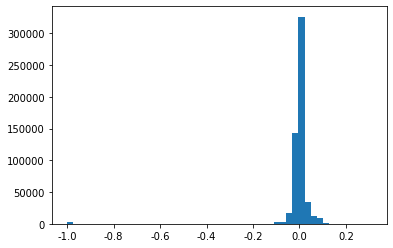

In [30]:
plt.hist(data['currentPercent'],bins=50)

In [274]:
data_chuang = data[np.array(data['stockCode'].str.startswith('688')) | np.array(data['stockCode'].str.startswith('300'))]

In [275]:
data_chuang.index = range(data_chuang.shape[0])

In [276]:
data_normal = data[np.array(~data['stockCode'].str.startswith('688')) & np.array(~data['stockCode'].str.startswith('300'))]

In [277]:
data_normal.index = range(data_normal.shape[0])

In [278]:
per_list = ['-0.1 to -0.07', '-0.07 to -0.03', '-0.03 to 0', '0 to 0.03', '0.03 to 0.07', '0.07 to 0.1']

In [279]:
df_normal = pd.DataFrame()
df_normal['涨跌幅'] = per_list

In [280]:
tmp = list()
tmp.append(np.mean((data_normal['currentPercent'] > -0.1) & (data_normal['currentPercent'] <= -0.07)))
tmp.append(np.mean((data_normal['currentPercent'] > -0.07) & (data_normal['currentPercent'] <= -0.03)))
tmp.append(np.mean((data_normal['currentPercent'] > -0.03) & (data_normal['currentPercent'] <= 0)))
tmp.append(np.mean((data_normal['currentPercent'] > 0) & (data_normal['currentPercent'] <= 0.03)))
tmp.append(np.mean((data_normal['currentPercent'] > 0.03) & (data_normal['currentPercent'] <= 0.07)))
tmp.append(np.mean((data_normal['currentPercent'] > 0.07) & (data_normal['currentPercent'] <= 0.1)))

In [281]:
df_normal['股票percent'] = tmp

In [282]:
df_normal

,涨跌幅,股票percent
0,-0.1 to -0.07,0.005533
1,-0.07 to -0.03,0.030120
2,-0.03 to 0,0.499145
3,0 to 0.03,0.379945
4,0.03 to 0.07,0.050373
5,0.07 to 0.1,0.014077


In [283]:
per_list_chuang = ['-0.2 to -0.14', '-0.14 to -0.06', '-0.06 to 0', '0 to 0.06', '0.06 to 0.14', '0.14 to 0.2']

In [284]:
df_chuang = pd.DataFrame()
df_chuang['涨跌幅'] = per_list_chuang

In [285]:
tmp = list()
tmp.append(np.mean((data_chuang['currentPercent'] > -0.2) & (data_chuang['currentPercent'] <= -0.14)))
tmp.append(np.mean((data_chuang['currentPercent'] > -0.14) & (data_chuang['currentPercent'] <= -0.06)))
tmp.append(np.mean((data_chuang['currentPercent'] > -0.06) & (data_chuang['currentPercent'] <= 0)))
tmp.append(np.mean((data_chuang['currentPercent'] > 0) & (data_chuang['currentPercent'] <= 0.06)))
tmp.append(np.mean((data_chuang['currentPercent'] > 0.06) & (data_chuang['currentPercent'] <= 0.14)))
tmp.append(np.mean((data_chuang['currentPercent'] > 0.14) & (data_chuang['currentPercent'] <= 0.2)))

In [286]:
df_chuang['股票percent'] = tmp

In [289]:
df_chuang['amount'] = np.array(df_chuang['股票percent']) * 136456

In [291]:
df_normal['amount'] = np.array(df_normal['股票percent']) * 419848

In [293]:
df_chuang

,涨跌幅,股票percent,amount
0,-0.2 to -0.14,0.000982,134.0
1,-0.14 to -0.06,0.012004,1638.0
2,-0.06 to 0,0.480155,65520.0
3,0 to 0.06,0.455751,62190.0
4,0.06 to 0.14,0.031519,4301.0
5,0.14 to 0.2,0.003591,490.0


In [142]:
#收盘前一分钟涨跌幅
#data['openTimeBefore1'] = pd.to_datetime(data['openTime'].dt.date).apply(lambda x: x.replace(hour=14, minute=59))

In [143]:
data.head()

,stockCode,createTime,createTimeDay,sourceTime,timeAfter1,openTime,currentPercent,openTimeBefore1
0,600988.SH,2020-08-01 09:31:38,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,-0.021858,2020-07-31 14:59:00
1,601933.SH,2020-08-01 09:31:37,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,0.003337,2020-07-31 14:59:00
2,600030.SH,2020-08-01 09:31:37,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,0.011682,2020-07-31 14:59:00
3,600848.SH,2020-08-01 09:32:06,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,0.006482,2020-07-31 14:59:00
4,603069.SH,2020-08-01 09:32:03,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,0.000000,2020-07-31 14:59:00


In [197]:
def fun(x):
    stockCode = x[0]
    openTime = x[1]
    #openTimeBefore1 = x[2]
    percentBeforeClose = (minute_stocks_close.loc[stockCode,openTime] - minute_stocks_open.loc[stockCode,openTime])/minute_stocks_open.loc[stockCode,openTime]
    return percentBeforeClose

In [199]:
data['percentBeforeClose'] = data[['stockCode', 'openTime']].apply(fun, axis=1)

<ipython-input-197-d50b92677bf4>:5: RuntimeWarning: divide by zero encountered in double_scalars
  percentBeforeClose = (minute_stocks_close.loc[stockCode,openTime] - minute_stocks_open.loc[stockCode,openTime])/minute_stocks_open.loc[stockCode,openTime]


In [200]:
data.head()

,stockCode,createTime,createTimeDay,sourceTime,timeAfter1,openTime,currentPercent,openTimeBefore1,percentBeforeClose
0,600988.SH,2020-08-01 09:31:38,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,-0.021858,2020-07-31 14:59:00,0.000547
1,601933.SH,2020-08-01 09:31:37,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,0.003337,2020-07-31 14:59:00,0.001114
2,600030.SH,2020-08-01 09:31:37,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,0.011682,2020-07-31 14:59:00,-0.000334
3,600848.SH,2020-08-01 09:32:06,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,0.006482,2020-07-31 14:59:00,0.000865
4,603069.SH,2020-08-01 09:32:03,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,0.000000,2020-07-31 14:59:00,0.000000


In [201]:
np.mean(abs(data['percentBeforeClose'][data['percentBeforeClose']!=np.Inf]))

0.0012004667992105964

In [202]:
import random
import time

In [203]:
#generate random timestamp
def strTimeProp(start, end, prop, frmt):
    stime = time.mktime(time.strptime(start, frmt))
    etime = time.mktime(time.strptime(end, frmt))
    ptime = stime + prop * (etime - stime)
    return int(ptime)

def randomTimestamp(start, end, frmt='%Y-%m-%d %H:%M:%S'):
    return strTimeProp(start, end, random.random(), frmt)

def randomDate(start, end, frmt='%Y-%m-%d %H:%M:%S'):
    return time.strftime(frmt, time.localtime(strTimeProp(start, end, random.random(), frmt)))

def randomTimestampList(start, end, n, frmt='%Y-%m-%d %H:%M:%S'):
    return [randomTimestamp(start, end, frmt) for _ in range(n)]

def randomDateList(start, end, n, frmt='%Y-%m-%d %H:%M:%S'):
    return [randomDate(start, end, frmt) for _ in range(n)]

In [246]:
#一天1440分钟
#交易240分钟
#simulation
def fun(x):
    stockCode = x[0]
    openTime = x[1]
    openDay = openTime.strftime('%Y-%m-%d')
    openDay = pd.to_datetime(openDay)
    x_start = openDay.replace(hour=9,minute=31)
    x_end = openDay.replace(hour=11,minute=30)
    list1 = randomDateList(str(x_start),str(x_end),50)
    list1 = pd.to_datetime(list1).strftime('%Y-%m-%d, %H:%M')
    list1 = pd.to_datetime(list1)
    x_start = openDay.replace(hour=13,minute=1)
    x_end = openDay.replace(hour=15,minute=0)
    list2=randomDateList(str(x_start),str(x_end),50)
    list2 = pd.to_datetime(list2).strftime('%Y-%m-%d, %H:%M')
    list2 = pd.to_datetime(list2)
    li = list()
    for t in list1:
        li.append(abs((minute_stocks_close.loc[stockCode,t] - minute_stocks_open.loc[stockCode,t])/minute_stocks_open.loc[stockCode,t]))
    for t in list2:
        li.append(abs((minute_stocks_close.loc[stockCode,t] - minute_stocks_open.loc[stockCode,t])/minute_stocks_open.loc[stockCode,t]))
    return np.mean(np.array(li))

In [247]:
data['randomPercent'] = data[['stockCode','openTime']].apply(fun,axis=1)

<ipython-input-246-dcfc9994f490>:18: RuntimeWarning: divide by zero encountered in double_scalars
  li.append(abs((minute_stocks_close.loc[stockCode,t] - minute_stocks_open.loc[stockCode,t])/minute_stocks_open.loc[stockCode,t]))
<ipython-input-246-dcfc9994f490>:18: RuntimeWarning: invalid value encountered in double_scalars
  li.append(abs((minute_stocks_close.loc[stockCode,t] - minute_stocks_open.loc[stockCode,t])/minute_stocks_open.loc[stockCode,t]))
<ipython-input-246-dcfc9994f490>:20: RuntimeWarning: invalid value encountered in double_scalars
  li.append(abs((minute_stocks_close.loc[stockCode,t] - minute_stocks_open.loc[stockCode,t])/minute_stocks_open.loc[stockCode,t]))


In [254]:
np.mean(data['randomPercent'][data['randomPercent'] != np.Inf])

0.0013291802120576162

In [249]:
data.head()

,stockCode,createTime,createTimeDay,sourceTime,timeAfter1,openTime,currentPercent,openTimeBefore1,percentBeforeClose,randomPercent
0,600988.SH,2020-08-01 09:31:38,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,-0.021858,2020-07-31 14:59:00,0.000547,0.002409
1,601933.SH,2020-08-01 09:31:37,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,0.003337,2020-07-31 14:59:00,0.001114,0.000866
2,600030.SH,2020-08-01 09:31:37,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,0.011682,2020-07-31 14:59:00,-0.000334,0.001657
3,600848.SH,2020-08-01 09:32:06,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,0.006482,2020-07-31 14:59:00,0.000865,0.001250
4,603069.SH,2020-08-01 09:32:03,2020-08-01,2020-08-03 09:31:00,2020-08-03 09:32:00,2020-07-31 15:00:00,0.000000,2020-07-31 14:59:00,0.000000,0.003209
